In [63]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from v1dd_public import ARTIFACT_DIR
import seaborn as sns
from pathlib import Path

In [64]:
colors = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#F1C40F',  # Yellow
    '#9B59B6',  # Purple
    'cyan',     # Cyan, named color
    'magenta',  # Magenta, named color
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#581845',  # Dark Purple
    '#34495E',  # Asphalt
    '#16A085',  # Green Sea
    '#E74C3C',  # Red Orange
    '#2980B9',  # Belize Hole Blue
    'chocolate' # Chocolate, named color
]

mouse_colors = {'slc2': "#66CCEE", 'slc4': "#228833", 'slc5': '#CCBB44', 'teto1': '#EE6677'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]
z_groups_low_to_high = [[50, 66, 82], [98, 114, 130], [146, 162, 178], [194, 210, 226], [242, 258, 274], [290, 306, 322], [338, 354, 370], \
    [386, 402, 418], [434, 450, 466], [482, 498, 514], [500, 525, 550], [575, 600, 625], [650, 675, 700, 725]]

## plotting parameters
from matplotlib import rcParams
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "Arial"

fontsize=13
figures_dir = Path('/home/naomi/Desktop/figures/v1dd_plots')

In [65]:
stim_types = [
    "drifting_gratings_full", 
    "drifting_gratings_windowed", 
    "natural_images_12", 
    "natural_images"
    ]
decode_dims = {
    "drifting_gratings_full": ["direction", "spatial"],
    "drifting_gratings_windowed": ["direction", "spatial"],
    "natural_images_12": ["image_index"],
    "natural_images": ["image_index"]
               }
repetitions = 1000

chance = {
    "drifting_gratings_full_direction": 1/12, 
    "drifting_gratings_full_spatial": 1/2, 
    "drifting_gratings_full_direction_spatial": 1/24, 
    "drifting_gratings_windowed_direction": 1/12, 
    "drifting_gratings_windowed_spatial": 1/2, 
    "drifting_gratings_windowed_direction_spatial": 1/24, 
    "natural_images_12_image_index": 1/12,
    "natural_images_image_index": 1/118}

depth_mapping = {
    66: [50, 66, 82],
    114: [98, 114, 130], 
    162: [146, 162, 178],
    210: [194, 210, 226],
    258: [242, 258, 274],
    306: [290, 306, 322],
    354: [338, 354, 370],
    402: [386, 402, 418],
    450: [434, 450, 466],
    498: [482, 498, 514]
}

depths = [66,
    114, 
    162,
    210,
    258,
    306,
    354,
    402,
    450,
    498]

In [66]:
def depth_volume_mapping(a, b):
    depth_values = {
        1: {1: 66, 4: 114},
        2: {1: 162, 4: 210},
        3: {1: 258, 4: 306},
        4: {1: 354, 4: 402},
        5: {1: 450, 4: 498},
    }

    return depth_values[a][b[1]]


In [67]:
tag = "20240731"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(ARTIFACT_DIR, f'decoding_analyses/{tag}_{stim_type}_{decode_dim}')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping(a = x['volume_id'], b = x['planes']), axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


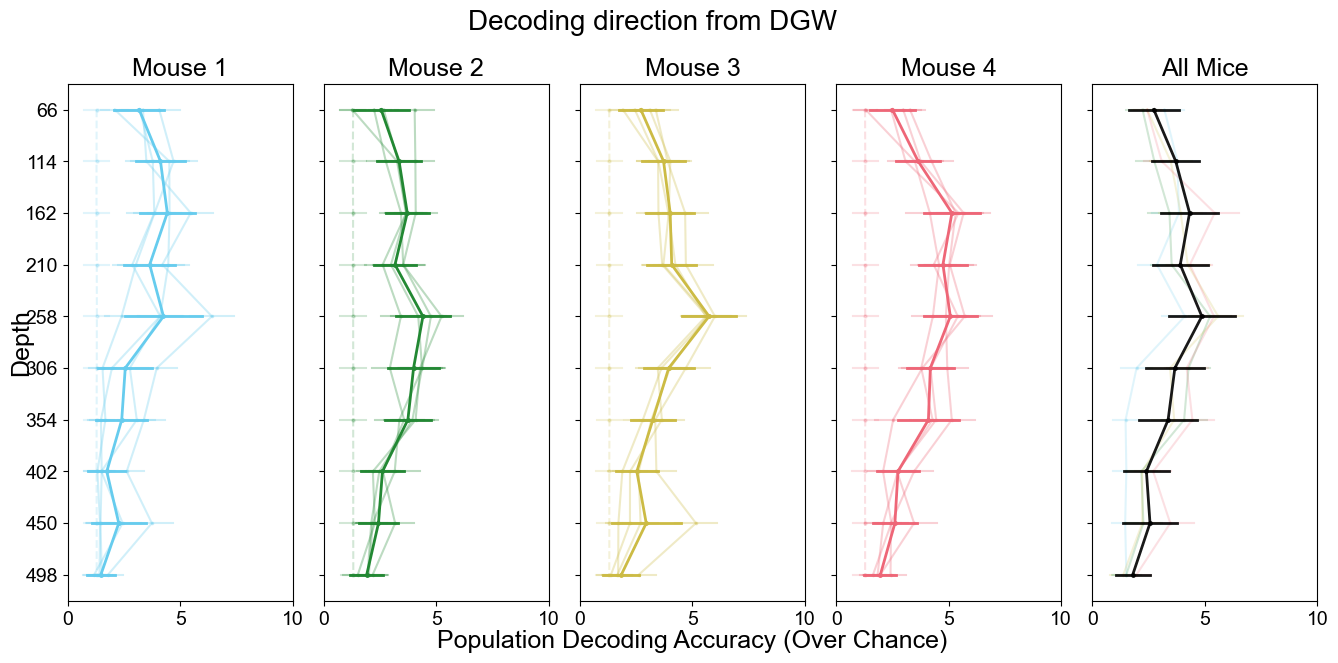

In [68]:
fig, axs = plt.subplots(1,5,sharex=True, sharey=True, figsize=(14, 7))
jitter_amount = 0.15
n_z_groups = 10
num_elements = len(mice)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_z_groups, 1))

sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_windowed")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_shuf_results_df = sub_results_df.explode('shuf_test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
sub_shuf_results_df['shuf_test_accuracies'] = sub_shuf_results_df['shuf_test_accuracies'] / (1/12)


for idx, mouse in enumerate(sub_results_df.mouse_id.unique()):
    temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse)]

    sns.pointplot(
        data=temp_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=2,
        markersize=2,
        ax=axs[idx],
    )

    temp_df = sub_shuf_results_df[(sub_shuf_results_df['mouse_id'] == mouse)]
    sns.pointplot(
        data=temp_df,
        y='depth',
        x="shuf_test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=1.5,
        markersize=2,
        alpha=0.2,
        linestyle="--",
        ax=axs[idx]
    )

    axs[idx].tick_params(axis='both', which='major', labelsize=14)
    axs[idx].set_xlim(0, 8)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].set_title(f'Mouse {idx+1}', fontsize=18)

for idx, mouse in enumerate(sub_test_results_df.mouse_id.unique()):
    for column in sub_test_results_df.column_id.unique():
        temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse) & (sub_test_results_df['column_id'] == column)]

        sns.pointplot(
            data=temp_df,
            y='depth',
            x="test_accuracies",
            orient='h',
            color=mouse_colors[mice[idx]],
            errorbar="sd",
            linewidth=1.5,
            markersize=1.5,
            alpha=.3,
            ax=axs[idx]
        )
        axs[idx].set_xlabel('')
        axs[idx].set_ylabel('')


for idx, mouse in enumerate(sub_test_results_df.mouse_id.unique()):
    temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse) & (sub_test_results_df['column_id'] == column)]

    sns.pointplot(
        data=temp_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=1.5,
        markersize=1.5,
        alpha=.2,
        ax=axs[4]
    )

sns.pointplot(
        data=sub_test_results_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color='black',
        errorbar="sd",
        linewidth=2,
        markersize=2,
        alpha=0.9,
        ax=axs[4]
    )

axs[4].tick_params(axis='both', which='major', labelsize=14)
axs[4].set_xlim(0, 10)
axs[4].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_title('All Mice', fontsize=18)

plt.suptitle('Decoding direction from DGW', fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('Population Decoding Accuracy (Over Chance)', fontsize=18)
plt.ylabel('Depth', fontsize=18)

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, '5A_DGW_decoding.eps'), format='eps', bbox_inches='tight', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


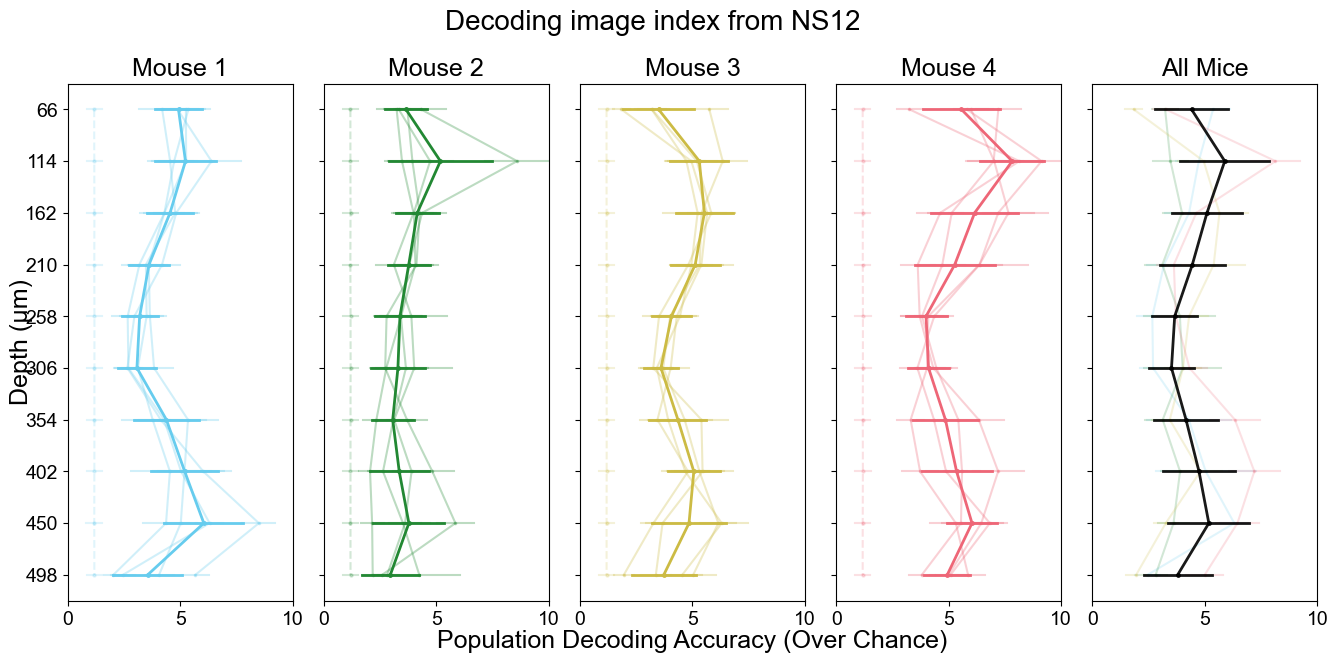

In [69]:
fig, axs = plt.subplots(1,5,sharex=True, sharey=True, figsize=(14, 7))
jitter_amount = 0.15
n_z_groups = 10
num_elements = len(mice)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_z_groups, 1))

sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "image_index") &
    (all_results_df['stim_type'] == "natural_images_12")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_shuf_results_df = sub_results_df.explode('shuf_test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
sub_shuf_results_df['shuf_test_accuracies'] = sub_shuf_results_df['shuf_test_accuracies'] / (1/12)

for idx, mouse in enumerate(sub_results_df.mouse_id.unique()):
    temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse)]

    sns.pointplot(
        data=temp_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=2,
        markersize=2,
        ax=axs[idx],
    )

    temp_df = sub_shuf_results_df[(sub_shuf_results_df['mouse_id'] == mouse)]
    sns.pointplot(
        data=temp_df,
        y='depth',
        x="shuf_test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=1.5,
        markersize=2,
        alpha=0.2,
        linestyle="--",
        ax=axs[idx]
    )

    axs[idx].set_xlim(0, 8)
    axs[idx].tick_params(axis='both', which='major', labelsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')

    axs[idx].set_title(f'Mouse {idx+1}', fontsize=18)

for idx, mouse in enumerate(sub_test_results_df.mouse_id.unique()):
    for column in sub_test_results_df.column_id.unique():
        temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse) & (sub_test_results_df['column_id'] == column)]

        sns.pointplot(
            data=temp_df,
            y='depth',
            x="test_accuracies",
            orient='h',
            color=mouse_colors[mice[idx]],
            errorbar="sd",
            linewidth=1.5,
            markersize=1.5,
            alpha=.3,
            ax=axs[idx]
        )
        axs[idx].set_xlabel('')
        axs[idx].set_ylabel('')


for idx, mouse in enumerate(sub_test_results_df.mouse_id.unique()):
    temp_df = sub_test_results_df[(sub_test_results_df['mouse_id'] == mouse) & (sub_test_results_df['column_id'] == column)]

    sns.pointplot(
        data=temp_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color=mouse_colors[mice[idx]],
        errorbar="sd",
        linewidth=1.5,
        markersize=1.5,
        alpha=.2,
        ax=axs[4]
    )

sns.pointplot(
        data=sub_test_results_df,
        y='depth',
        x="test_accuracies",
        orient='h',
        color='black',
        errorbar="sd",
        linewidth=2,
        markersize=2,
        alpha=0.9,
        ax=axs[4]
    )

axs[4].set_xlim(0, 10)
axs[4].tick_params(axis='both', which='major', labelsize=14)
axs[4].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_title('All Mice', fontsize=18)

plt.suptitle('Decoding image index from NS12', fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('Population Decoding Accuracy (Over Chance)', fontsize=18)
plt.ylabel("Depth (µm)", fontsize=18)

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, '5B_NS12_decoding.eps'), format='eps', bbox_inches='tight', dpi=300)

In [ ]:
stim_types = [
    "drifting_gratings_full", 
    "drifting_gratings_windowed", 
    "natural_images_12", 
    "natural_images"
    ]
decode_dims = {
    "drifting_gratings_full": ["direction"],
    "drifting_gratings_windowed": ["direction"],
    "natural_images_12": ["image_index"],
    "natural_images": ["image_index"]
               }

In [71]:
n_subplots = 4
n_bootstrap = 1000
n_samples = 50
n_depths = len(depths)
mouse_ids_mod = [409828, 416296, 427836, 438833]
n_mice = len(mouse_ids_mod)
column_ids = [2, 3, 4, 5]
n_columns = len(column_ids)
bootstrapped_data = np.zeros((n_subplots, n_bootstrap, n_depths, n_mice, n_columns))

stim_type_decode_dims = []
subplot_idx = 0
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims: 
        for m, mouse_id in enumerate(mouse_ids_mod):
            for c, column_id in enumerate(column_ids):
                for z, depth in enumerate(depths):
                        test_accuracies_mean = all_results_df[
                            (all_results_df['mouse_id'] == mouse_id) & 
                            (all_results_df['depth'] == depth) &
                            (all_results_df['stim_type'] == stim_type) &
                            (all_results_df['decode_dim'] == decode_dim) & 
                            (all_results_df['column_id'] == column_id)
                            ].test_accuracies_mean.values
                            
                        if len(test_accuracies_mean) > 0:
                            bootstrapped_data[subplot_idx, :, z, m, c] = test_accuracies_mean
                        elif len(test_accuracies_mean) > 1:
                            print('help')
                        else:
                            continue
    
        stim_type_decode_dims.append(stim_type + "_" + decode_dim)
        subplot_idx += 1


In [72]:
n_depths

10

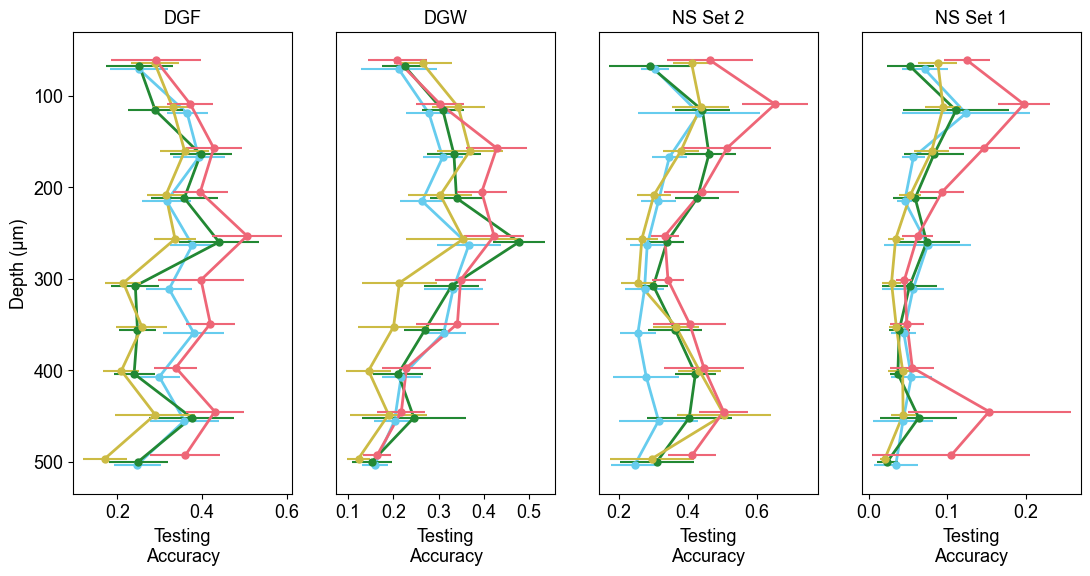

In [73]:
jitter_amount = 5
num_elements = len(mouse_ids_mod)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_depths, 1))
titles = [
    'DGF',
    'DGW',
    'NS Set 2',
    'NS Set 1'
]

fig = plt.figure(figsize=(13, 6))
for s in range(n_subplots):
    ax = plt.subplot(1, n_subplots, s + 1)
    
    for m, mouse_id in enumerate(mouse_ids_mod):
        means = []
        std_errors = []
        mouse_color = mouse_colors[mice[m]]
        
        for z in range(n_depths):
            bootstrapped_values = bootstrapped_data[s, :, z, m, :]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)

        jitter = fixed_jitters[:, 3-m]
        y_positions = np.array([int(np.mean(x)) for x in z_groups_low_to_high[:-3]]) + jitter
        
        plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=5)
        plt.plot(means, y_positions, color=mouse_color, linewidth=2)

        plt.xlabel('Testing\nAccuracy', fontsize=fontsize)
        plt.title(titles[s], fontsize=fontsize)
    
    if s == 0:
        plt.yticks(fontsize=fontsize)
        plt.ylabel("Depth (µm)", fontsize=fontsize)
    else:
        plt.yticks([])

    plt.xticks(fontsize=fontsize)
    plt.ylim(30, 535)
    plt.gca().invert_yaxis()
# plt.show()
plt.savefig(os.path.join(figures_dir, 'decoding_accuracy_jittered.eps'), format='eps', bbox_inches='tight', dpi=300)

In [74]:
jitter.shape

(10,)